In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pygeohash as pgh
from sklearn import metrics

%matplotlib inline

In [111]:
data = 'data/unit_data.csv'
df = pd.read_csv(data)
df.head()

,id,avg_price,avg_cpm,zip_code,zip_code_id,lat,lon,size,price,rate_card_price,floor_price,cpm,impressions,supplier_id,supplier_face_id
0,468328,850.0,12.58,4042,7217,41.437770,-75.654900,"10' 6"" x 22' 9""",850.0,1020.0,NaN,12.58,67568,39,290
1,107547,400.0,2.05,4012,15252,29.135220,-82.044840,10' x 40',400.0,480.0,NaN,2.05,195304,39,3849
2,316324,250.0,1.54,4006,39634,34.062725,-118.052900,6' x 12',250.0,300.0,NaN,1.54,162504,39,4484
3,2065349,460.0,0.28,4022,31588,30.219819,-93.358694,12' x 24',460.0,460.0,NaN,0.28,1626044,799,0308A S/F
4,430511,1500.0,3.75,4045,12375,34.007264,-81.015278,10' x 40',1500.0,1800.0,NaN,3.75,399972,39,71292


In [112]:
import re

heights = [] 
widths = []
for size_val in df['size']:
    size_val = size_val.replace("'", "")
    height_match = re.search("^(.*?)'", size_val)
    if height_match:
        heights.append(height_match.group(1))
    else:
        heights.append(0)
    width_match = re.search("(?<=x ).*?(?=')", size_val)
    if width_match:
        widths.append(width_match.group(0))
    else:
        widths.append(0)
        
rounded_heights = []
for h in heights:
    if h == '3 units each 70"H x 48"W or 1 large unit 68':
        h = 70
    elif h == '2 (40':
        h = 40
    elif h == '123"h x 291"w 10':
        h = 123
    elif h == 'EF - 10':
        h = 10
    elif h == 'EF-10':
        h = 10
    elif h == '14" x 48':
        h = 14
    elif h == '(2x) 52':
        h = 52
    elif h == 'Eco Flex - 10':
        h = 10
    elif h == 'NW 1st Ave (13" x 16':
        h = 13
    elif h == '22" x 21':
        h = 22
    elif h == '(1) 34':
        h = 34
    elif h == '54th Street (11':
        h = 11
    elif h == '6th Ave (27':
        h = 27
    elif h == '(7':
        h = 7
    elif h == 'Wall A - 30':
        h = 30
    elif h == 'C- 40':
        h = 40
    elif h == 'Top(4':
        h = 4
    elif h == '5 Panels - (1) 6':
        h = 6
    elif h == '6 Panels Total A: 16 x 8':
        h = 16
    elif h == 'LA-SVW-110 24':
        h = 24
    elif h == 'West Face- 29':
        h = 29
    rounded_heights.append(5 * round(float(h) / 5))
    
rounded_widths = []
for w in widths:
    if w == '48"W or 1 large unit 68':
        w = 48
    elif w == '291"w 10':
        w = 291
    rounded_widths.append(5 * round(float(w) / 5))

df['rounded_height'] = rounded_heights
df['rounded_width'] = rounded_widths

In [113]:
df['sqft'] = [l[0] * l[1] for l in list(zip(df.rounded_height, df.rounded_width))]
df['geo_hash'] = [pgh.encode(l[0], l[1], precision=4) for l in list(zip(df.lat, df.lon))]
df.head()

,id,avg_price,avg_cpm,zip_code,zip_code_id,lat,lon,size,price,rate_card_price,floor_price,cpm,impressions,supplier_id,supplier_face_id,rounded_height,rounded_width,sqft,geo_hash
0,468328,850.0,12.58,4042,7217,41.437770,-75.654900,"10' 6"" x 22' 9""",850.0,1020.0,NaN,12.58,67568,39,290,10,20,200,dr65
1,107547,400.0,2.05,4012,15252,29.135220,-82.044840,10' x 40',400.0,480.0,NaN,2.05,195304,39,3849,10,40,400,djjt
2,316324,250.0,1.54,4006,39634,34.062725,-118.052900,6' x 12',250.0,300.0,NaN,1.54,162504,39,4484,5,10,50,9qh1
3,2065349,460.0,0.28,4022,31588,30.219819,-93.358694,12' x 24',460.0,460.0,NaN,0.28,1626044,799,0308A S/F,10,25,250,9vme
4,430511,1500.0,3.75,4045,12375,34.007264,-81.015278,10' x 40',1500.0,1800.0,NaN,3.75,399972,39,71292,10,40,400,dnn3


In [114]:
df = df[['id', 'price', 'supplier_id', 'lat', 'lon', 'sqft', 'geo_hash', 'price', 'cpm', 'impressions']]
df.head()

,id,price,supplier_id,lat,lon,sqft,geo_hash,price,cpm,impressions
0,468328,850.0,39,41.437770,-75.654900,200,dr65,850.0,12.58,67568
1,107547,400.0,39,29.135220,-82.044840,400,djjt,400.0,2.05,195304
2,316324,250.0,39,34.062725,-118.052900,50,9qh1,250.0,1.54,162504
3,2065349,460.0,799,30.219819,-93.358694,250,9vme,460.0,0.28,1626044
4,430511,1500.0,39,34.007264,-81.015278,400,dnn3,1500.0,3.75,399972


In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# feature_cols = ['lat', 'lon', 'sqft', 'impressions', 'cpm']
feature_cols = ['sqft', 'impressions', 'cpm']

df[feature_cols] = scaler.fit_transform(
    df[feature_cols].to_numpy()
)
df.head()

,id,price,supplier_id,lat,lon,sqft,geo_hash,price,cpm,impressions
0,468328,850.0,39,41.437770,-75.654900,-0.086115,dr65,850.0,0.002254,-0.179452
1,107547,400.0,39,29.135220,-82.044840,0.010185,djjt,400.0,-0.020716,-0.116268
2,316324,250.0,39,34.062725,-118.052900,-0.158341,9qh1,250.0,-0.021828,-0.132493
3,2065349,460.0,799,30.219819,-93.358694,-0.062040,9vme,460.0,-0.024577,0.591438
4,430511,1500.0,39,34.007264,-81.015278,0.010185,dnn3,1500.0,-0.017007,-0.015031


In [117]:
# from sklearn.cluster import DBSCAN
# for min_sample in range(20, 80, 20):
#     for eps in range(1, 8, 2):
#         clustering = DBSCAN(eps=(eps/10), min_samples=min_sample).fit(df[feature_cols])
#         df['cluster'] = clustering.labels_
#         print(min_sample, eps)
#         print(metrics.silhouette_score(df[feature_cols], df['cluster'], metric='euclidean'))

In [118]:
df['cluster'] = clustering.labels_
# clustering = DBSCAN(eps=.7, min_samples=20).fit(df[['lat', 'lon', 'sqft', 'impressions', 'cpm']])
clustering = DBSCAN(eps=.3, min_samples=20).fit(df[feature_cols])
metrics.silhouette_score(df[feature_cols], df['cluster'], metric='euclidean')

0.9813130601837137

In [119]:
df.cluster.unique

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
21140    0
21141    0
21142    0
21143    0
21144    0
Name: cluster, Length: 21145, dtype: int64>

In [120]:
df.sort_values('cluster')

,id,price,supplier_id,lat,lon,sqft,geo_hash,price,cpm,impressions,cluster
686,367067,22212.477,747,33.798811,-84.391233,0.720401,dn5b,22212.477,-0.018054,3.147930,-1
12765,458218,45000.000,36,40.759307,-73.985470,6.642883,dr5r,45000.000,-0.007104,2.473619,-1
12759,49794,7000.000,28,37.801872,-122.412163,-0.086115,9q8z,7000.000,-0.024009,6.190606,-1
12752,2387178,20000.000,609,40.700936,-74.013195,140.151517,dr5r,20000.000,-0.017858,2.733224,-1
17383,1713145,1500.000,856,32.848701,-96.572482,0.178711,9vg6,1500.000,-0.024707,3.137682,-1
...,...,...,...,...,...,...,...,...,...,...,...
7049,504677,1250.000,39,42.701490,-73.698660,-0.086115,dred,1250.000,-0.018491,-0.011176,0
7048,489011,900.000,39,44.717925,-85.626390,-0.086115,dpgn,900.000,-0.007824,-0.156930,0
7047,509554,1500.000,39,32.397859,-99.753928,-0.086115,9vc0,1500.000,-0.013844,-0.070310,0
7045,488496,3500.000,39,40.353290,-75.951790,0.178711,dr1v,3500.000,-0.018098,0.319845,0


TypeError: '<' not supported between instances of 'str' and 'int'

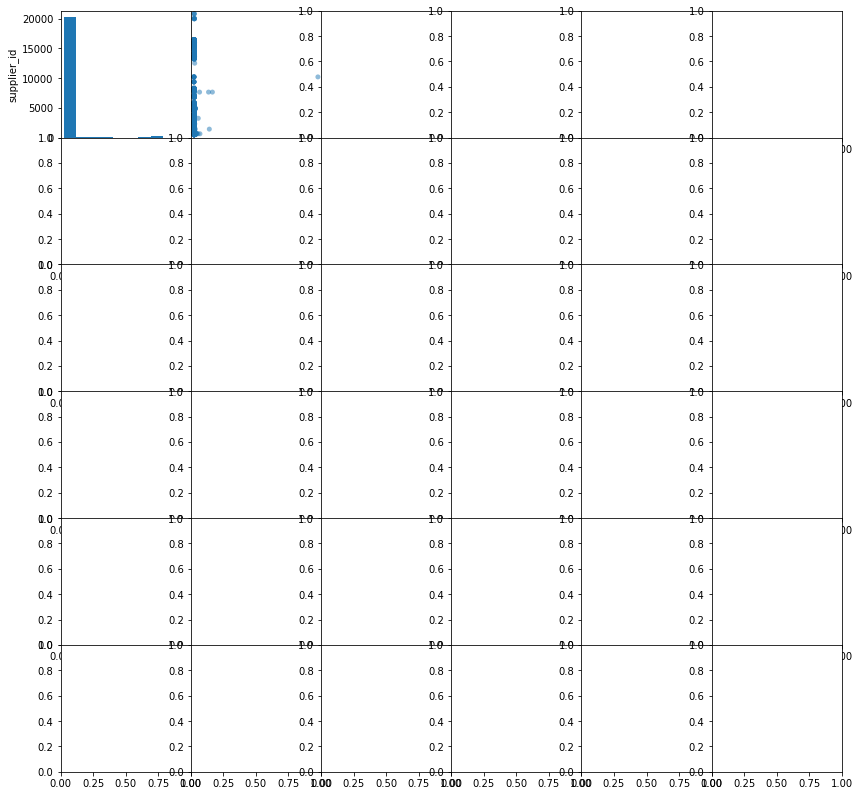

In [123]:
# plt.figure(figsize=(12, 12))
# plt.scatter(df['supplier_id'], df['cluster']);
# pd.plotting.scatter_matrix(df[feature_cols], figsize=(14,14), s=100);
pd.plotting.scatter_matrix(df[['supplier_id', 'sqft', 'geo_hash', 'price', 'cpm', 'impressions']], figsize=(14,14), s=100);